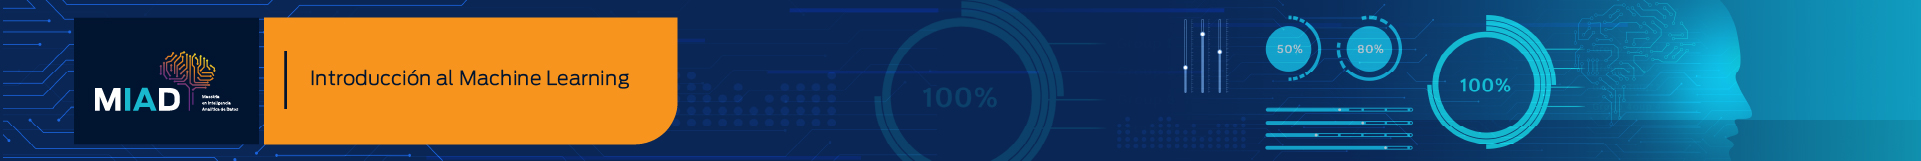

# Introducción al Deep learning - Semana 1
## Redes neuronales: Red neuronal de dos capas a pedal

### Propósito de la actividad


### Instrucciones generales

1. Para realizar la actividad solo siga las indicaciones asociadas a cada celda del notebook. Sin embargo, siéntase libre de modificar el archivo editando las celdas, lo que le permitirá afianzar su comprensión sobre las distintas funcionalidades de código.  

2. Recuerde que para esta actividad NO necesita realizar ningún tipo de entrega.

### Librerías a importar

A continuación se muestran los comandos a ejecutar para poder implementar los procedimientos de este notebook:


Data Set Information:

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.


Attribute Information:

1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)

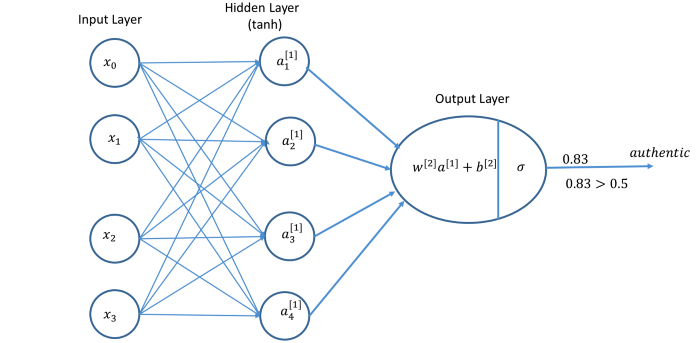


In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [67]:
data = np.genfromtxt('data_banknote_authentication.txt', delimiter = ',')
X = data[:,:4]
y = data[:, 4]
#data = load_iris()
#X= data['data']
#y= data['target']
#plt.scatter(X[:, 2], y, alpha=0.2,c=y, cmap='viridis')
#plt.xlabel('variance of wavelet')
#plt.ylabel('skewness of wavelet');

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.T
y_train = y_train.reshape(1, y_train.shape[0])
X_test = X_test.T
y_test = y_test.reshape(1, y_test.shape[0])
print ('X Train dimensiones: ', X_train.shape)
print ('Y Train dimensiones: ', y_train.shape)

X Train dimensiones:  (4, 1097)
Y Train dimensiones:  (1, 1097)


In [69]:
def estructuras(X, Y):
    input_unit = X.shape[0] # Dimension de entrada
    hidden_unit = 4 # Unidades de capa oculta
    output_unit = Y.shape[0] # Dimension de variable de salida
    return (input_unit, hidden_unit, output_unit)
(input_unit, hidden_unit, output_unit) = estructuras(X_train, y_train)
print("Dimension de capa entrada:  = " + str(input_unit))
print("Dimension de capa oculta:  = " + str(hidden_unit))
print("Dimension de capa de salida:  = " + str(output_unit))

Dimension de capa entrada:  = 4
Dimension de capa oculta:  = 4
Dimension de capa de salida:  = 1


In [70]:
def inicializacion(input_unit, hidden_unit, output_unit):
    np.random.seed(2) 
    W1 = np.random.randn(hidden_unit, input_unit)*0.01
    b1 = np.zeros((hidden_unit, 1))
    W2 = np.random.randn(output_unit, hidden_unit)*0.01
    b2 = np.zeros((output_unit, 1))
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters

In [71]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    cache = {"Z1": Z1,"A1": A1,"Z2": Z2,"A2": A2}
    
    return A2, cache

In [72]:
def cross_entropy_cost(A2, Y, parameters):
    # Muestras de entrenamiento
    m = Y.shape[1] 
    # Calcular cross entropy
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1-Y), np.log(1 - A2))
    cost = - np.sum(logprobs) / m
    cost = float(np.squeeze(cost))        
    return cost

In [73]:
def backward_propagation(parameters, cache, X, Y):
    #Muestras de entrenamiento
    m = X.shape[1]
    W1 = parameters['W1']
    W2 = parameters['W2']
    A1 = cache['A1']
    A2 = cache['A2']
    dZ2 = A2-Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1/m) * np.dot(dZ1, X.T) 
    db1 = (1/m)*np.sum(dZ1, axis=1, keepdims=True)
    grads = {"dW1": dW1, "db1": db1, "dW2": dW2,"db2": db2}
    return grads

In [74]:
def gradient_descent(parameters, grads, learning_rate = 0.01):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1, "b1": b1,"W2": W2,"b2": b2}
    
    return parameters

In [83]:
def neural_network_model(X, Y, hidden_unit, num_iterations = 10000):
    np.random.seed(3)
    input_unit = estructuras(X, Y)[0]
    output_unit = estructuras(X, Y)[2]
    
    parameters = inicializacion(input_unit, hidden_unit, output_unit)
   
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    costs=[]
    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X, parameters)
        cost = cross_entropy_cost(A2, Y, parameters)
        costs.append(cost)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = gradient_descent(parameters, grads)
        if i % 5 == 0:
            print ("Costo en la iteracion  %i: %f" %(i, cost))
    return parameters, costs
parameters, costs = neural_network_model(X_train, y_train, 4, num_iterations=10000)

Costo en la iteracion  0: 0.693229
Costo en la iteracion  5: 0.692918
Costo en la iteracion  10: 0.692621
Costo en la iteracion  15: 0.692337
Costo en la iteracion  20: 0.692064
Costo en la iteracion  25: 0.691802
Costo en la iteracion  30: 0.691548
Costo en la iteracion  35: 0.691303
Costo en la iteracion  40: 0.691064
Costo en la iteracion  45: 0.690832
Costo en la iteracion  50: 0.690604
Costo en la iteracion  55: 0.690381
Costo en la iteracion  60: 0.690161
Costo en la iteracion  65: 0.689943
Costo en la iteracion  70: 0.689727
Costo en la iteracion  75: 0.689512
Costo en la iteracion  80: 0.689297
Costo en la iteracion  85: 0.689082
Costo en la iteracion  90: 0.688865
Costo en la iteracion  95: 0.688647
Costo en la iteracion  100: 0.688426
Costo en la iteracion  105: 0.688201
Costo en la iteracion  110: 0.687973
Costo en la iteracion  115: 0.687739
Costo en la iteracion  120: 0.687501
Costo en la iteracion  125: 0.687256
Costo en la iteracion  130: 0.687004
Costo en la iteracion  

Costo en la iteracion  1305: 0.447246
Costo en la iteracion  1310: 0.446035
Costo en la iteracion  1315: 0.444832
Costo en la iteracion  1320: 0.443637
Costo en la iteracion  1325: 0.442450
Costo en la iteracion  1330: 0.441273
Costo en la iteracion  1335: 0.440103
Costo en la iteracion  1340: 0.438942
Costo en la iteracion  1345: 0.437789
Costo en la iteracion  1350: 0.436645
Costo en la iteracion  1355: 0.435509
Costo en la iteracion  1360: 0.434381
Costo en la iteracion  1365: 0.433262
Costo en la iteracion  1370: 0.432151
Costo en la iteracion  1375: 0.431049
Costo en la iteracion  1380: 0.429954
Costo en la iteracion  1385: 0.428868
Costo en la iteracion  1390: 0.427790
Costo en la iteracion  1395: 0.426721
Costo en la iteracion  1400: 0.425659
Costo en la iteracion  1405: 0.424606
Costo en la iteracion  1410: 0.423560
Costo en la iteracion  1415: 0.422523
Costo en la iteracion  1420: 0.421494
Costo en la iteracion  1425: 0.420472
Costo en la iteracion  1430: 0.419459
Costo en la 

Costo en la iteracion  2565: 0.305070
Costo en la iteracion  2570: 0.304823
Costo en la iteracion  2575: 0.304577
Costo en la iteracion  2580: 0.304331
Costo en la iteracion  2585: 0.304087
Costo en la iteracion  2590: 0.303844
Costo en la iteracion  2595: 0.303602
Costo en la iteracion  2600: 0.303360
Costo en la iteracion  2605: 0.303120
Costo en la iteracion  2610: 0.302881
Costo en la iteracion  2615: 0.302642
Costo en la iteracion  2620: 0.302405
Costo en la iteracion  2625: 0.302168
Costo en la iteracion  2630: 0.301932
Costo en la iteracion  2635: 0.301698
Costo en la iteracion  2640: 0.301464
Costo en la iteracion  2645: 0.301231
Costo en la iteracion  2650: 0.300999
Costo en la iteracion  2655: 0.300768
Costo en la iteracion  2660: 0.300538
Costo en la iteracion  2665: 0.300309
Costo en la iteracion  2670: 0.300080
Costo en la iteracion  2675: 0.299853
Costo en la iteracion  2680: 0.299626
Costo en la iteracion  2685: 0.299400
Costo en la iteracion  2690: 0.299175
Costo en la 

Costo en la iteracion  3780: 0.265034
Costo en la iteracion  3785: 0.264924
Costo en la iteracion  3790: 0.264814
Costo en la iteracion  3795: 0.264705
Costo en la iteracion  3800: 0.264595
Costo en la iteracion  3805: 0.264486
Costo en la iteracion  3810: 0.264378
Costo en la iteracion  3815: 0.264269
Costo en la iteracion  3820: 0.264161
Costo en la iteracion  3825: 0.264053
Costo en la iteracion  3830: 0.263945
Costo en la iteracion  3835: 0.263838
Costo en la iteracion  3840: 0.263731
Costo en la iteracion  3845: 0.263624
Costo en la iteracion  3850: 0.263517
Costo en la iteracion  3855: 0.263411
Costo en la iteracion  3860: 0.263305
Costo en la iteracion  3865: 0.263199
Costo en la iteracion  3870: 0.263093
Costo en la iteracion  3875: 0.262988
Costo en la iteracion  3880: 0.262882
Costo en la iteracion  3885: 0.262778
Costo en la iteracion  3890: 0.262673
Costo en la iteracion  3895: 0.262569
Costo en la iteracion  3900: 0.262464
Costo en la iteracion  3905: 0.262360
Costo en la 

Costo en la iteracion  4945: 0.244748
Costo en la iteracion  4950: 0.244678
Costo en la iteracion  4955: 0.244609
Costo en la iteracion  4960: 0.244539
Costo en la iteracion  4965: 0.244469
Costo en la iteracion  4970: 0.244400
Costo en la iteracion  4975: 0.244331
Costo en la iteracion  4980: 0.244262
Costo en la iteracion  4985: 0.244193
Costo en la iteracion  4990: 0.244124
Costo en la iteracion  4995: 0.244055
Costo en la iteracion  5000: 0.243986
Costo en la iteracion  5005: 0.243918
Costo en la iteracion  5010: 0.243849
Costo en la iteracion  5015: 0.243781
Costo en la iteracion  5020: 0.243713
Costo en la iteracion  5025: 0.243645
Costo en la iteracion  5030: 0.243577
Costo en la iteracion  5035: 0.243509
Costo en la iteracion  5040: 0.243441
Costo en la iteracion  5045: 0.243374
Costo en la iteracion  5050: 0.243306
Costo en la iteracion  5055: 0.243239
Costo en la iteracion  5060: 0.243171
Costo en la iteracion  5065: 0.243104
Costo en la iteracion  5070: 0.243037
Costo en la 

Costo en la iteracion  6265: 0.229958
Costo en la iteracion  6270: 0.229913
Costo en la iteracion  6275: 0.229869
Costo en la iteracion  6280: 0.229824
Costo en la iteracion  6285: 0.229780
Costo en la iteracion  6290: 0.229736
Costo en la iteracion  6295: 0.229692
Costo en la iteracion  6300: 0.229647
Costo en la iteracion  6305: 0.229603
Costo en la iteracion  6310: 0.229559
Costo en la iteracion  6315: 0.229516
Costo en la iteracion  6320: 0.229472
Costo en la iteracion  6325: 0.229428
Costo en la iteracion  6330: 0.229384
Costo en la iteracion  6335: 0.229340
Costo en la iteracion  6340: 0.229297
Costo en la iteracion  6345: 0.229253
Costo en la iteracion  6350: 0.229210
Costo en la iteracion  6355: 0.229167
Costo en la iteracion  6360: 0.229123
Costo en la iteracion  6365: 0.229080
Costo en la iteracion  6370: 0.229037
Costo en la iteracion  6375: 0.228994
Costo en la iteracion  6380: 0.228951
Costo en la iteracion  6385: 0.228907
Costo en la iteracion  6390: 0.228865
Costo en la 

Costo en la iteracion  7645: 0.219712
Costo en la iteracion  7650: 0.219681
Costo en la iteracion  7655: 0.219650
Costo en la iteracion  7660: 0.219619
Costo en la iteracion  7665: 0.219588
Costo en la iteracion  7670: 0.219557
Costo en la iteracion  7675: 0.219526
Costo en la iteracion  7680: 0.219495
Costo en la iteracion  7685: 0.219464
Costo en la iteracion  7690: 0.219434
Costo en la iteracion  7695: 0.219403
Costo en la iteracion  7700: 0.219372
Costo en la iteracion  7705: 0.219341
Costo en la iteracion  7710: 0.219311
Costo en la iteracion  7715: 0.219280
Costo en la iteracion  7720: 0.219250
Costo en la iteracion  7725: 0.219219
Costo en la iteracion  7730: 0.219188
Costo en la iteracion  7735: 0.219158
Costo en la iteracion  7740: 0.219128
Costo en la iteracion  7745: 0.219097
Costo en la iteracion  7750: 0.219067
Costo en la iteracion  7755: 0.219036
Costo en la iteracion  7760: 0.219006
Costo en la iteracion  7765: 0.218976
Costo en la iteracion  7770: 0.218946
Costo en la 

Costo en la iteracion  9020: 0.212351
Costo en la iteracion  9025: 0.212328
Costo en la iteracion  9030: 0.212305
Costo en la iteracion  9035: 0.212282
Costo en la iteracion  9040: 0.212259
Costo en la iteracion  9045: 0.212236
Costo en la iteracion  9050: 0.212213
Costo en la iteracion  9055: 0.212190
Costo en la iteracion  9060: 0.212168
Costo en la iteracion  9065: 0.212145
Costo en la iteracion  9070: 0.212122
Costo en la iteracion  9075: 0.212099
Costo en la iteracion  9080: 0.212076
Costo en la iteracion  9085: 0.212054
Costo en la iteracion  9090: 0.212031
Costo en la iteracion  9095: 0.212008
Costo en la iteracion  9100: 0.211986
Costo en la iteracion  9105: 0.211963
Costo en la iteracion  9110: 0.211941
Costo en la iteracion  9115: 0.211918
Costo en la iteracion  9120: 0.211896
Costo en la iteracion  9125: 0.211873
Costo en la iteracion  9130: 0.211851
Costo en la iteracion  9135: 0.211828
Costo en la iteracion  9140: 0.211806
Costo en la iteracion  9145: 0.211783
Costo en la 

In [84]:
def prediction(parameters, X):
    A2, cache = forward_propagation(X, parameters)
    predictions = np.round(A2)
    return predictions

In [85]:
predictions = prediction(parameters, X_train)
print ('Accuracy Train: %d' % float((np.dot(y_train, predictions.T) + np.dot(1 - y_train, 1 - predictions.T))/float(y_train.size)*100) + '%')
predictions = prediction(parameters, X_test)
print ('Accuracy Test: %d' % float((np.dot(y_test, predictions.T) + np.dot(1 - y_test, 1 - predictions.T))/float(y_test.size)*100) + '%')

Accuracy Train: 93%
Accuracy Test: 91%


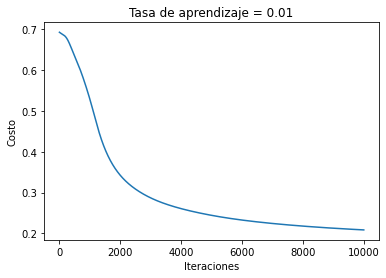

In [86]:
plt.plot(costs)
plt.ylabel('Costo')
plt.xlabel('Iteraciones')
plt.title("Tasa de aprendizaje = 0.01" )
plt.show()